Initial developing of basic visualization examples

In [1]:
# This uses a small dataset from the CDC (% of Pap Smears in USA vs. time vs. education)
# https://www.cdc.gov/nchs/fastats/pap-tests.htm
# The goal is to demonstrate how different types of visualization represent the same data

# Load a spectrum of libraries
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import seaborn as sns



In [2]:
# Read in the small XLS file, and respective tabs, w/ the dataset into a pandas dataframe
# Note- previously sliced up dataset into various forms in different tabs to learn how different python could manipulate it

with pd.ExcelFile('PapSmears_USA_sample3.xlsx') as xls:
    df0 = pd.read_excel(xls, 'Pap-Edu-Year-1', index_col=0)
    df1 = pd.read_excel(xls, '25-44-A')
    df2 = pd.read_excel(xls, '25-44-B')
    df3 = pd.read_excel(xls, '25-44-C')
    df4 = pd.read_excel(xls, '45-64-A')
    df5 = pd.read_excel(xls, '45-64-B')
    df6 = pd.read_excel(xls, '45-64-C')
    df7 = pd.read_excel(xls, '65-74-A')
    df8 = pd.read_excel(xls, '65-74-B')
    df9 = pd.read_excel(xls, '65-74-C')

# Take a peek at the total dataset to confirm it loaded okay ~ divide up by edu levels

nine_equal_dfs_contiguous = {name: group for name, group in df0.groupby(np.arange(99) // 11)}
print('nine_equal_dfs_contiguous')
print(nine_equal_dfs_contiguous)


nine_equal_dfs_contiguous
{0:      Age Range              Educational Level  Pap Smears Percentage
Year                                                                
1987     25-44  No high school diploma or GED                   77.3
1993     25-44  No high school diploma or GED                   73.1
1994     25-44  No high school diploma or GED                   76.3
1998     25-44  No high school diploma or GED                   77.6
1999     25-44  No high school diploma or GED                   78.4
2000     25-44  No high school diploma or GED                   78.6
2005     25-44  No high school diploma or GED                   74.7
2008     25-44  No high school diploma or GED                   76.5
2010     25-44  No high school diploma or GED                   69.0
2013     25-44  No high school diploma or GED                   71.6
2015     25-44  No high school diploma or GED                   73.8, 1:      Age Range           Educational Level  Pap Smears Percentage
Yea

In [3]:
# Exploring the first mini-dataset
print(type(df1))

print(df1.shape)

print(df1.columns)

print(df1.index)

print(df1.describe())

print(df1)


<class 'pandas.core.frame.DataFrame'>
(11, 4)
Index(['Year', 'Age Range', 'Educational Level', 'Pap Smears Percentage'], dtype='object')
RangeIndex(start=0, stop=11, step=1)
              Year  Pap Smears Percentage
count    11.000000              11.000000
mean   2002.000000              75.172727
std       8.933085               3.047652
min    1987.000000              69.000000
25%    1996.000000              73.450000
50%    2000.000000              76.300000
75%    2009.000000              77.450000
max    2015.000000              78.600000
    Year Age Range              Educational Level  Pap Smears Percentage
0   1987     25-44  No high school diploma or GED                   77.3
1   1993     25-44  No high school diploma or GED                   73.1
2   1994     25-44  No high school diploma or GED                   76.3
3   1998     25-44  No high school diploma or GED                   77.6
4   1999     25-44  No high school diploma or GED                   78.4
5   2000  

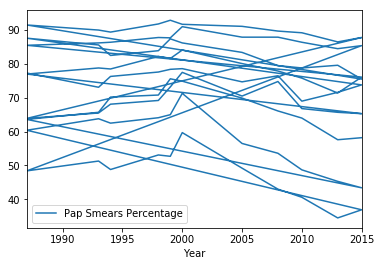

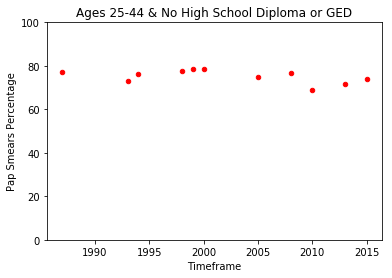

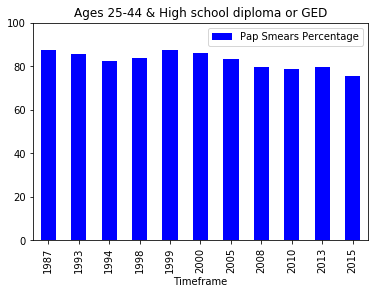

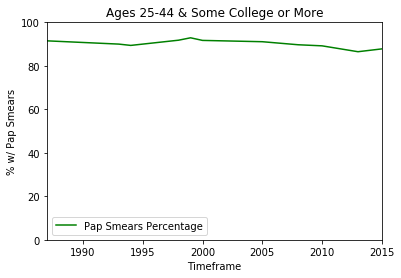

In [15]:
# Start exploratory data visualizing

df0.plot(kind ='line')

# 25 - 44 years vs. educational levels 

df1.plot(x = 'Year', y = 'Pap Smears Percentage', kind ='scatter', color= 'red')
plt.ylim(0, 100)
#plt.xlim(1985, 2017)
plt.title('Ages 25-44 & No High School Diploma or GED')
plt.xlabel('Timeframe')

df2.plot(x = 'Year', y = 'Pap Smears Percentage', kind ='bar', color= 'blue')
plt.ylim(0, 100)
#plt.xlim(1985, 2017)
plt.title('Ages 25-44 & High school diploma or GED')
plt.xlabel('Timeframe')

df3.plot(x = 'Year', y = 'Pap Smears Percentage', kind ='line', color= 'green')
plt.ylim(0, 100)
#plt.xlim(1985, 2017)
plt.title('Ages 25-44 & Some College or More')
plt.xlabel('Timeframe')

plt.ylabel('% w/ Pap Smears')
plt.show()



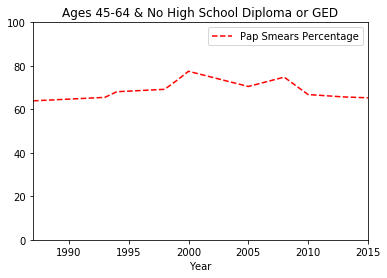

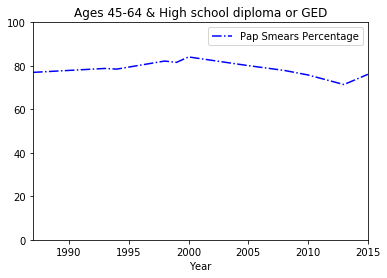

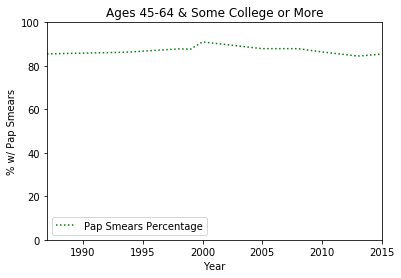

In [7]:
# 45 - 64 years vs. educational levels 

df4.plot(x = 'Year', y = 'Pap Smears Percentage', kind ='line', color= 'red', linestyle='dashed')
plt.ylim(0, 100)
plt.title('Ages 45-64 & No High School Diploma or GED')
#plt.xlabel('Timeframe')

df5.plot(x = 'Year', y = 'Pap Smears Percentage', kind ='line', color= 'blue', linestyle='dashdot')
plt.ylim(0, 100)
plt.title('Ages 45-64 & High school diploma or GED')
#plt.xlabel('Timeframe')

df6.plot(x = 'Year', y = 'Pap Smears Percentage', kind ='line', color= 'green', linestyle='dotted')
plt.ylim(0, 100)
plt.title('Ages 45-64 & Some College or More')
#plt.xlabel('Timeframe')

plt.ylabel('% w/ Pap Smears')
plt.show()


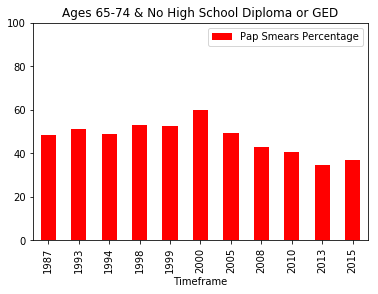

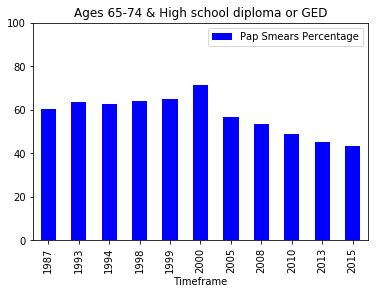

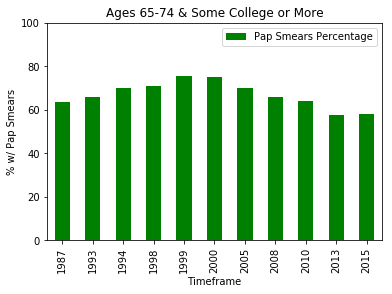

In [16]:
# 65 - 74 years vs. educational levels 

df7.plot(x = 'Year', y = 'Pap Smears Percentage', kind ='bar', color= 'red')
plt.ylim(0, 100)
plt.title('Ages 65-74 & No High School Diploma or GED')
plt.xlabel('Timeframe')

df8.plot(x = 'Year', y = 'Pap Smears Percentage', kind ='bar', color= 'blue')
plt.ylim(0, 100)
plt.title('Ages 65-74 & High school diploma or GED')
plt.xlabel('Timeframe')

df9.plot(x = 'Year', y = 'Pap Smears Percentage', kind ='bar', color= 'green')
plt.ylim(0, 100)
plt.title('Ages 65-74 & Some College or More')
plt.xlabel('Timeframe')

plt.ylabel('% w/ Pap Smears')
plt.show()
